## Five Year U.S. Temperature Anomaly Animation

In [1]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.patches as mpatches
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import xarray as xr
from IPython.display import HTML
#%matplotlib qt

In [16]:
# Load GISTEMP data
file = "gistemp1200_GHCNv4_ERSSTv5.nc"
combined_temp_ds = xr.open_dataset(file)

# Extract temperature data for the United States (replace lat and lon with desired coordinates)
us_temperature_data = combined_temp_ds['tempanomaly'].sel(lat=slice(24, 49), lon=slice(-125, -66))

# Calculate the 10-year mean temperature anomaly for the United States
us_ten_year_mean_temp = us_temperature_data.rolling(time=120, center=True).mean()

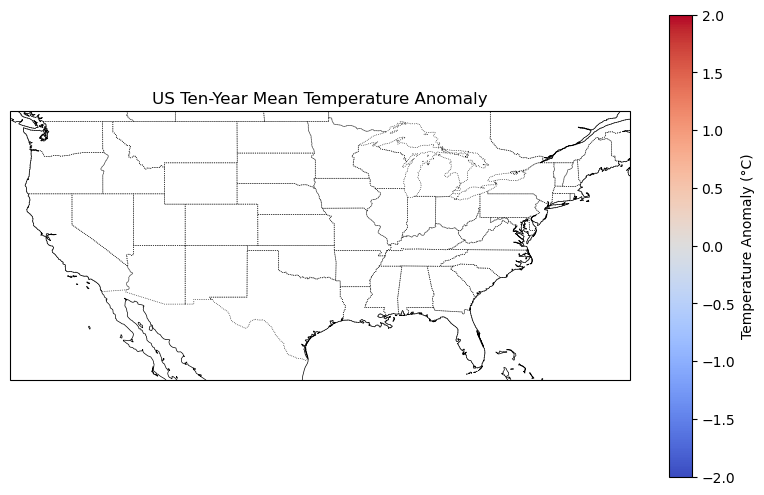

In [17]:
# Set up the animation
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': ccrs.PlateCarree()})
cax = ax.pcolormesh(us_ten_year_mean_temp.lon, us_ten_year_mean_temp.lat, us_ten_year_mean_temp.isel(time=0), shading='auto', cmap='coolwarm', vmin=-2, vmax=2)
fig.colorbar(cax, label='Temperature Anomaly (°C)')

# Add state borders
ax.add_feature(cfeature.STATES, linestyle=':', edgecolor='black', linewidth=0.5)

# Add coastlines
ax.add_feature(cfeature.COASTLINE, linestyle='-', edgecolor='black', linewidth=0.5)

# Set title
ax.set_title('US Five-Year Mean Temperature Anomaly')

# Set time axis
ax.text(0.99, 0.01, str(us_ten_year_mean_temp.time[0].values)[:10], transform=ax.transAxes, ha='right', color='white')

def update(frame):
    cax.set_array(us_ten_year_mean_temp.isel(time=frame).values.ravel())
    ax.text(0.99, 0.01, str(us_ten_year_mean_temp.time[frame].values)[:10], transform=ax.transAxes, ha='right', color='white')

In [18]:
ani = animation.FuncAnimation(fig, update, frames=len(us_ten_year_mean_temp.time), repeat=False)
plt.show()

In [19]:
ani.save('us_temperature_animation.html', writer='html')

# Display the saved HTML file
HTML('us_temperature_animation.html')

## 10 Year U.S. Temperature Anomaly Animation

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.patches as mpatches
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import xarray as xr

In [ ]:
# Load GISTEMP data
file = "gistemp1200_GHCNv4_ERSSTv5.nc"
combined_temp_ds = xr.open_dataset(file)

# Extract temperature data for the United States (replace lat and lon with desired coordinates)
us_temperature_data = combined_temp_ds['tempanomaly'].sel(lat=slice(24, 49), lon=slice(-125, -66))

# Calculate the 10-year mean temperature anomaly for the United States
us_ten_year_mean_temp = us_temperature_data.rolling(time=120, center=True).mean()

In [ ]:
# Set up the animation
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': ccrs.PlateCarree()})
cax = ax.pcolormesh(us_ten_year_mean_temp.lon, us_ten_year_mean_temp.lat, us_ten_year_mean_temp.isel(time=0), shading='auto', cmap='coolwarm', vmin=-2, vmax=2)
fig.colorbar(cax, label='Temperature Anomaly (°C)')

# Add state lines
ax.add_feature(cfeature.BORDERS, linestyle=':', edgecolor='black', linewidth=0.5)

# Add coastal lines
ax.add_feature(cfeature.COASTLINE, linestyle='-', edgecolor='black', linewidth=0.5)

# Set title
ax.set_title('US Ten-Year Mean Temperature Anomaly')

# Set time axis
ax.text(0.99, 0.01, str(us_ten_year_mean_temp.time[0].values)[:10], transform=ax.transAxes, ha='right', color='white')

def update(frame):
    cax.set_array(us_ten_year_mean_temp.isel(time=frame).values.ravel())
    ax.text(0.99, 0.01, str(us_ten_year_mean_temp.time[frame].values)[:10], transform=ax.transAxes, ha='right', color='white')

ani = animation.FuncAnimation(fig, update, frames=len(us_ten_year_mean_temp.time), repeat=False)

In [ ]:
# Save the animation to an HTML file
ani.save('us_temperature_animation.html', writer='html')

# Display the saved HTML file
HTML('us_temperature_animation.html')